# Elemento `Beam`

## Fundamento teórico

El elemento `Beam` (viga) es un elemento finito bidimensional donde las coordenadas locales y globales coinciden. Está caracterizado por una función de forma lineal. El elemento `Beam` tiene un modulo de elasticidad *E*, momento de inercia *I* y longitud *L*. Cada elemento `Beam` tiene dos nodos y se asume horizontal como se muestra en la figura. En este caso la matriz de rigidez del elemento está dada por la matriz siguiente, asumiendo que la deformación axial es despreciable:

$$
k = \frac{EI}{L^3}
\begin{bmatrix}
12 & 6L & -12 & 6L \\
6L & 4L^2 & -6L & 2L^2 \\
-12 & -6L & 12 & -6L \\
6L & 2L^2 & -6L & 4L^2 
\end{bmatrix}
$$

<img src="src/beam-element/beam_element.PNG" width="200px"> </img>

Está claro que el elemento `Beam` tiene cuatro grados de libertad, dos en cada nodo: un desplazamiento transversal y una rotación. La convención de signos utilizada es la tradicional: los desplazamientos son positivos hacia arriba y las rotaciones cuando son antihorario.

## Ejemplos resueltos

**Ejemplo 1**. Viga empotrada

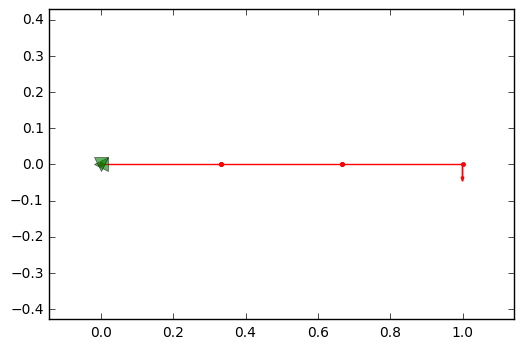

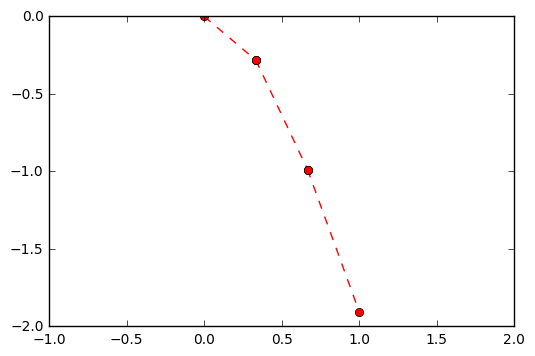

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from nusa import *
import itertools
import matplotlib.pyplot as plt

def pairwise(iterable):
    #~ "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = itertools.tee(iterable)
    next(b, None)
    return itertools.izip(a, b)

# Input data 
E = 210e9 # psi
I = 0.0000083333
L = 1
P = 10e3

nelm = 4
parts = np.linspace(0,L,nelm)

nodos = []
for xc in parts:
    cn = Node((xc,0))
    nodos.append(cn)

elementos = []
for x in pairwise(nodos):
    ni,nj = x[0], x[1]
    ce = Beam((ni,nj),E,I,L/(nelm-1))
    elementos.append(ce)

m = BeamModel()

for n in nodos: m.addNode(n)
for e in elementos: m.addElement(e)

m.addConstraint(nodos[0], ux=0, uy=0, ur=0)
m.addForce(nodos[-1], (-P,))
m.plot_model()
m.solve()
m.plot_disp()
#xx = np.linspace(0,L)
#d = ((-P*xx**2.0)/(6.0*E*I))*(3*L - xx)
#plt.plot(xx,d)
#plt.axis("auto")
#plt.xlim(0,1.1*L)

**Ejemplo 2**. Determine los desplazamientos nodales y rotaciones, fuerzas nodales globales, y fuerzas en elementos para la viga mostrada en la figura. Se ha discretizado la viga como se indica en la numeración nodal. La viga está fija en los nodos 1 y 5, y tiene un soporte de rodillo en el nodo 3. Las cargas verticales de 10 000 lb cada una son aplicadas en los nodos 2 y 4. Sea E=300x10<sup>6</sup> psi and I=500 in<sup>4</sup>.

<img src="src/beam-element/logan_E42.PNG" width="400px"> </img>

Desplazamientos nodales y rotaciones
UY 	 UR
0 	 0
-0.048 	 2.72848410532e-20
0 	 -1.09139364213e-19
-0.048 	 2.72848410532e-20
0 	 0

Fuerzas nodales globales
FY 	 M
5000.0 	 300000.0
-10000.0 	 0.0
10000.0 	 2.09183781408e-11
-10000.0 	 0.0
5000.0 	 -300000.0

Fuerzas en elementos

FY:
[[ 5000.]
 [-5000.]] 
 M:
[[ 300000.]
 [ 300000.]]


FY:
[[-5000.]
 [ 5000.]] 
 M:
[[-300000.]
 [-300000.]]


FY:
[[ 5000.]
 [-5000.]] 
 M:
[[ 300000.]
 [ 300000.]]


FY:
[[-5000.]
 [ 5000.]] 
 M:
[[-300000.]
 [-300000.]]



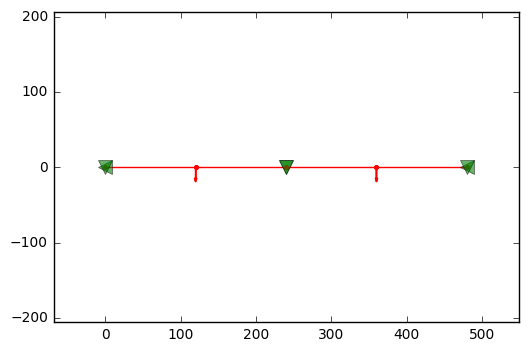

In [2]:
"""
Logan, D. (2007). A first course in the finite element analysis.
Example 4.2 , pp. 166.
"""
from nusa.core import *
from nusa.model import *
from nusa.element import *

# Input data 
E = 30e6
I = 500.0
P = 10e3
L = 10*(12.0)  # ft -> in
# Model
m1 = BeamModel("Beam Model")
# Nodes
n1 = Node((0,0))
n2 = Node((10*12,0))
n3 = Node((20*12,0))
n4 = Node((30*12,0))
n5 = Node((40*12,0))
# Elements
e1 = Beam((n1,n2),E,I,L)
e2 = Beam((n2,n3),E,I,L)
e3 = Beam((n3,n4),E,I,L)
e4 = Beam((n4,n5),E,I,L)

# Add elements 
for nd in (n1,n2,n3,n4,n5): m1.addNode(nd)
for el in (e1,e2,e3,e4): m1.addElement(el)

m1.addForce(n2,(-P,))
m1.addForce(n4,(-P,))
m1.addConstraint(n1, ux=0,uy=0,ur=0) # fixed 
m1.addConstraint(n5, ux=0,uy=0,ur=0) # fixed
m1.addConstraint(n3, uy=0, ur=0) # fixed
m1.addConstraint(n2, ur=0)
m1.addConstraint(n4, ur=0)
m1.plot_model()
m1.solve() # Solve model

# Desplazamientos nodales y rotaciones
print("Desplazamientos nodales y rotaciones")
print("UY \t UR")
for node in m1.getNodes():
    print "{0} \t {1}".format(node.uy, node.ur)

# Fuerzas nodales globales
print("\nFuerzas nodales globales")
print("FY \t M")
for node in m1.getNodes():
    print "{0} \t {1}".format(node.fy, node.m)

# Fuerzas en elementos
print("\nFuerzas en elementos")
for element in m1.getElements():
    print "\nFY:\n{0} \n M:\n{1}\n".format(element.fy, element.m)

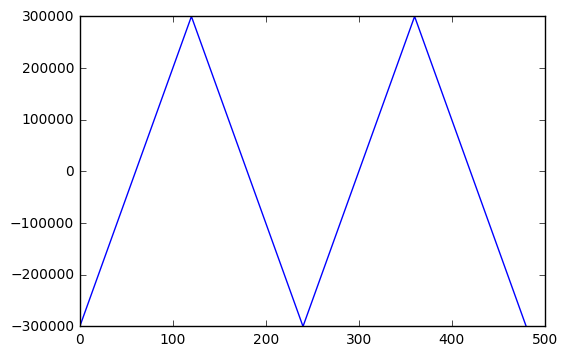

In [7]:
# Dibujando diagramas de cortante
m1.plot_moment_diagram()

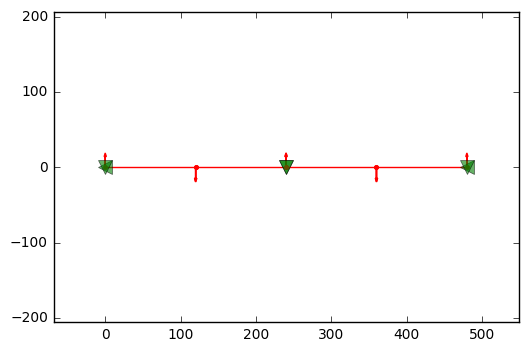

In [8]:
m1.plot_model()